<div style="border:solid green 2px; padding: 20px">
<b>Александр, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 
    <div class="alert alert-info">
        Привет, Евгений! На "ты" ок)
        </div>

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Выдвинем гипотезы и проверим их:
+ 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
+ 2. Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Описание тарифов
+ **Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
+ **Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Предварительное изучение данных:

### Загружаем данные и библиотеки:

In [83]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st

In [84]:
df_1 = pd.read_csv('/datasets/calls.csv')
display(df_1.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000


In [85]:
df_2 = pd.read_csv('/datasets/internet.csv')
display(df_2.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.950,2018-11-25,1000
1,1,1000_1,1052.810,2018-09-07,1000
2,2,1000_2,1197.260,2018-06-25,1000
3,3,1000_3,550.270,2018-08-22,1000
4,4,1000_4,302.560,2018-09-24,1000


In [86]:
df_3 = pd.read_csv('/datasets/messages.csv')
display(df_3.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [87]:
df_4 = pd.read_csv('/datasets/tariffs.csv')
display(df_4)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [88]:
df_5 = pd.read_csv('/datasets/users.csv')
display(df_5.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Вывод**: данные загружены, читабельны. Названия колонок корректны.

Посмотрим общую информацию о данных:

In [89]:
print('**Первый дата-сет**')
df_1.info()
print()
print('**Второй дата-сет**')
df_2.info()
print()
print('**Третий дата-сет**')
df_3.info()
print()
print('**Четвертый дата-сет**')
df_4.info()
print()
print('**Пятый дата-сет**')
df_5.info()

**Первый дата-сет**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

**Второй дата-сет**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

**Третий дата-сет**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
me

**Вывод**: Названия колонок и информация о них(жирным шрифтом выделим то - над чем нужно будет поработать в разделе предобработки данных):
+ **1. Первый дата-сет:** содержит 202607 строки и 4 колонки:
 + id - — уникальный номер звонка/ 202607 значений /  тип -  object
 + call_date — дата звонка       / 202607 значений /  **тип - object**
 + duration — длительность звонка в минутах / 202607 / тип - float64
 + user_id — идентификатор пользователя, сделавшего звонок / 202607 / тип - int64
+ **2. Второй дата-сет:** содержит 149396 строки и 5 колонок:
 + Unnamed: 0 - порядковый номер строки / 149396 значений / тип - int64
 + id — уникальный номер сессии /         149396 значений / тип - object
 + mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах) / 149396 значений /  тип - float64
 + session_date — дата интернет-сессии / 149396 значений /  **тип - object**
 + user_id — идентификатор пользователя / 149396 значений / тип - int64
+ **3. Третий дата-сет:** 123036 строк и 3 колонки:
 + id — уникальный номер сообщения / 123036 значений / тип - object
 + message_date — дата сообщения /  123036 значений / **тип - object**
 + user_id — идентификатор пользователя, отправившего сообщение / 123036 значений / тип - int64
+ **4. Четвертый дата-сет:** 2 строки и 8 колонок:
 + messages_included — количество сообщений в месяц, включённых в абонентскую плату / 2 значения / тип - int64
 + mb_per_month_included  — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) / 2 значения / тип - int64
 + minutes_included — количество минут разговора в месяц, включённых в абонентскую плату / 2 значения / тип - int64
 + rub_monthly_fee — ежемесячная абонентская плата в рублях / 2 значения / тип - int64 
 + rub_per_gb — стоим. дополн. гиг. интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) / 2 значения / int64
 + rub_per_message — стоимость отправки сообщения сверх тарифного пакета /  2 значения / тип - int64
 + rub_per_minute — стоимость минуты разговора сверх тарифного пакета 2 значения / тип - int64
 + tariff_name — название тарифа / 2 значения / тип - object
+ **5. Пятый дата-сет:** 500 строк и 8 колонок:
 + user_id — уникальный идентификатор пользователя / 500 значений / тип - int64
 + age — имя пользователя / 500 значений / тип - int64
 + churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) / 38 значений / тип - object
 + city — город проживания пользователя / 500 значений / тип - object
 + first_name — имя пользователя / 500 значений / тип - object
 + last_name — фамилия пользователя / 500 значений / тип - object
 + reg_date — дата подключения тарифа (день, месяц, год) / 500 значений / **тип - object**
 + tariff — название тарифного плана / 500 значений / тип - object


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
    
В том числе можно было бы сделать функцию для проверки наших первичных данных: 
    
- info
- head
- describe
- и так далее 
    
</div>

## Предобработка данных:

#### Предобработка df_1:

По результатам метода info(), видим что пропусков нет. Посмотрим на наличие дубликатов:

In [90]:
print('Количество дубликатов в df_1: {}'.format(df_1.duplicated().sum()))

Количество дубликатов в df_1: 0


In [91]:
df_1.head(2)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000


**Вывод:** в df_1 дубликатов нет.

Посмотрим на числовое описание колонки *duration*:

In [92]:
df_1['duration'].describe()

count   202607.000
mean         6.756
std          5.843
min          0.000
25%          1.300
50%          6.000
75%         10.700
max         38.000
Name: duration, dtype: float64

**Вывод**: Минимальное значение - 0, максимальное - 38 минут. Нулевые значения в дата-сете нам не нужны - это неотвеченные вызовы. Плата за них не взималась, поэтому их нужно удалить.

Удалим строки с нулевыми значениями: 

In [93]:
df_1 = df_1.query('duration != 0')

In [94]:
print('Количество строк с нулевой продолжительностью: {}'.format(len(df_1[df_1['duration'] == 0])))

Количество строк с нулевой продолжительностью: 0


Тип данных в столбце *call_date* - object. Приведем его к типу datetime, который будет соответствовать смыслу значений этого столбца:

In [95]:
df_1['call_date'] = pd.to_datetime(df_1['call_date'], format= '%Y-%m-%d')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


**Вывод**: Тип данных столбца *call_date* приведен к типу datetime.

Посмотрим на уникальные значения колонки *user_id*:

In [96]:
print(df_1['user_id'].value_counts())

1377    1424
1168    1384
1375    1270
1453    1145
1196     978
        ... 
1397      27
1442      23
1373      17
1016      14
1257       7
Name: user_id, Length: 492, dtype: int64


**Вывод**: видим, что в колонке 492 уникальных значения. Значения корректны. 

Посмотрим на диапазон дат:

In [97]:
df_1['call_date'].agg([min, max])

min   2018-01-01
max   2018-12-31
Name: call_date, dtype: datetime64[ns]

**Вывод**: имеем выборку за один год.

#### Предобработка df_2:

По результатам метода info(), видим что пропусков нет. Посмотрим на наличие дубликатов:

In [98]:
print('Количество дубликатов в df_2: {}'.format(df_2.duplicated().sum()))

Количество дубликатов в df_2: 0


**Вывод:** в df_2 дубликатов нет.

Посмотрим на числовое описание колонки *mb_used*:

In [99]:
df_2['mb_used'].describe()

count   149396.000
mean       370.192
std        278.301
min          0.000
25%        138.188
50%        348.015
75%        559.553
max       1724.830
Name: mb_used, dtype: float64

**Вывод**: Минимальное значение - 0 , максимальное - 1724.83 Мегабайт за сеанс. Значения вполне адекватны. Нулевые значения можно убрать.

Удалим строки с нулевыми значениями в колонке *mb_used*: 

In [100]:
df_2 = df_2.query('mb_used != 0')
print('Количество строк после в df_2 после удаления строк с нулевыми значениями в колонке *mb_used*: {}'.format(len(df_2)))

Количество строк после в df_2 после удаления строк с нулевыми значениями в колонке *mb_used*: 129798


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что подписываешь с помощью текста получившиеся расчеты 👍, ведь так быстрее понять что мы хотели посчитать.
    
</div>

Тип данных в столбце *session_date* - object. Приведем его к типу datetime, который будет соответствовать смыслу значений этого столбца:

In [101]:
df_2['session_date'] = pd.to_datetime(df_2['session_date'], format= '%Y-%m-%d')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


**Вывод**: Тип данных столбца *session_date* приведен к типу datetime.

Посмотрим на уникальные значения колонки *user_id*:

In [102]:
print(df_2['user_id'].value_counts())

1240    731
1385    725
1496    693
1227    691
1180    651
       ... 
1062     29
1467     26
1343     26
1192     21
1399      8
Name: user_id, Length: 497, dtype: int64


**Вывод**: видим, что в колонке 497 уникальных значения. Значения корректны. 

#### Предобработка df_3:

По результатам метода info(), видим что пропусков нет. Посмотрим на наличие дубликатов:

In [103]:
print('Количество дубликатов в df_3: {}'.format(df_3.duplicated().sum()))

Количество дубликатов в df_3: 0


**Вывод:** в df_3 дубликатов нет.

Тип данных в столбце *message_date* - object. Приведем его к типу datetime, который будет соответствовать смыслу значений этого столбца:

In [104]:
df_3['message_date'] = pd.to_datetime(df_3['message_date'], format= '%Y-%m-%d')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


**Вывод**: Тип данных столбца *message_date* приведен к типу datetime.

Посмотрим на уникальные значения колонки *user_id*:

In [105]:
print(df_3['user_id'].value_counts())

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64


**Вывод**: видим, что в колонке 426 уникальных значения. Значения корректны. 

#### Предобработка df_4:

В дата-сете **df_4** имеем всего 2 строки - это информация о тарифах. В предобработке не нуждается.

#### Предобработка df_5:

In [106]:
display(df_5.head(3))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


Посморим долю пропусков в колонке *churn_date*:

In [107]:
print('Доля пропусков в колонке churn_date: {}'.format(df_5['churn_date'].isna().mean()))

Доля пропусков в колонке churn_date: 0.924


Пропущенные значения - это абоненты, которые пользовались услугами связи как минимум до конца года. Так как рассматриваемый нами период - год, мы можем заполнить пропуски крайней датой этого года, т.е 2018-12-31:

In [108]:
df_5['churn_date'] = df_5['churn_date'].replace(np.nan, '2018-12-31')
print('Доля пропусков в колонке churn_date: {}'.format(df_5['churn_date'].isna().mean()))

Доля пропусков в колонке churn_date: 0.0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Классный способ посчитать доли пропусков в наших данных 👍
    
</div>

**Вывод**: пропуски в колонке *churn_date* заполнены

In [109]:
print('Количество дубликатов в df_5: {}'.format(df_5.duplicated().sum()))

Количество дубликатов в df_5: 0


**Вывод:** в df_5 дубликатов нет.

Посмотрим на уникальные значения колонки *user_id*:

In [110]:
print(df_5['user_id'].value_counts())

1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64


**Вывод**: видим, что в колонке 500 уникальных значений. Значения корректны. 

Посмотрим на числовое описание колонки *age*:

In [111]:
df_5['age'].describe()

count   500.000
mean     46.588
std      16.668
min      18.000
25%      32.000
50%      46.000
75%      62.000
max      75.000
Name: age, dtype: float64

**Вывод**: минимальное значение возраста - 18 лет, максимальное - 75. Все в порядке.

Тип данных в столбцах *churn_date* и *reg_date* - object. Приведем их к типу datetime, который будет соответствовать смыслу значений этого столбцов:

In [112]:
df_5['churn_date'] = pd.to_datetime(df_5['churn_date'], format= '%Y-%m-%d')
df_5['reg_date'] = pd.to_datetime(df_5['reg_date'], format= '%Y-%m-%d')
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Вывод**: Тип данных столбцах *churn_date* и *reg_date* приведены к типу datetime.

B столбцах *reg_date* и *churn_date* нам интересен только месяц, поэтому округлим эту дату до месяца:

In [113]:
df_5['reg_date'] = df_5['reg_date'].to_numpy().astype('datetime64[M]')
df_5['churn_date'] = df_5['churn_date'].to_numpy().astype('datetime64[M]')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Супер, просто супер 👍
    
На самом деле вижу наверное 2-ой или 3-ий раз такой способ получения дат 😊
    
</div>

In [114]:
df_5.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra
1,1001,41,2018-12-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-01,Стерлитамак,Евгений,Абрамович,2018-06-01,smart
3,1003,23,2018-12-01,Москва,Белла,Белякова,2018-08-01,ultra
4,1004,68,2018-12-01,Новокузнецк,Татьяна,Авдеенко,2018-05-01,ultra


## Добавление новых столбцов:

Отчетным периодом в данных тарифах является месяц, поэтому выделим в отдельную колонку значения месяца в df_1, df_2 и df_3:

In [115]:
df_1['month'] = df_1['call_date'].to_numpy().astype('datetime64[M]')
df_2['month'] = df_2['session_date'].to_numpy().astype('datetime64[M]')
df_3['month'] = df_3['message_date'].to_numpy().astype('datetime64[M]')

Так как округление длительности звонков происходит в большую сторону до целой минуты, для расчетов нам нужен столбец длительности звонков с целочисленным значением минут. Получим его путем округления значений столбца *duration* в большую сторону. Назовем его *duration_tariff*:

In [116]:
duration_tariff = []
duration_list = list(df_1['duration'])
for index in range(len(duration_list)):
    duration_tariff.append(mt.ceil(duration_list[index]))
df_1['duration_tariff'] = duration_tariff  

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего не использовать цикл при обработке наши данных на прямую, это может быть очень долго. На крайний случай мы можем использовать метод `apply` 
    
</div>

<div class="alert alert-info">
     Я, на самом деле, пробовал создать  столбец округления минут напрямую, но получилось только через цикл.
        </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что учитываем условия работы оператора связи.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Однако лучше использовать метод `np.ceil` и применять ко всему столбцу целиком, так вычисления будут работать быстрее.  
    
Вот неплохая статья по скоростям вычисления в различных способах.
    
https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6
    
</div>

<div class="alert alert-info">
     Пробовал вот так, но не работает
"df_1['duration_tariff'] = mt.ceil(df_1['duration'])"

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Поэтому лучше использовать `numpy.ceil`, потому что вероятнее всего `math.ceil` работает только с одним числом.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Оставил пример ниже по скорости отработки разных подходов.
    
</div>

In [117]:
%%time
duration_tariff = []
duration_list = list(df_1['duration'])
for index in range(len(duration_list)):
    duration_tariff.append(mt.ceil(duration_list[index]))

CPU times: user 94.7 ms, sys: 4.12 ms, total: 98.8 ms
Wall time: 103 ms


In [118]:
%timeit np.ceil(df_1['duration'])

332 µs ± 35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<div class="alert alert-info">
   Да, есть разница: милисекунды и наносекунды.
        </div>

Добавим новый столбец *gb_tariff* показыващий количество израсходованного трафика в гигабайтах согласно условиям тарификации, с округлением количества мегабайт в большую сторону:

In [119]:
gb_tariff = []
mb_used_list = list(df_2['mb_used'])
for index in range(len(mb_used_list)):
     gb_tariff.append(mt.ceil(mb_used_list[index]/1024))
df_2['gb_tariff'] = gb_tariff       

In [120]:
display(df_1.head(3))
display(df_2.head(3))
display(df_3.head(3))

,id,call_date,duration,user_id,month,duration_tariff
2,1000_2,2018-06-11,2.850,1000,2018-06-01,3
3,1000_3,2018-09-21,13.800,1000,2018-09-01,14
4,1000_4,2018-12-15,5.180,1000,2018-12-01,6


,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_tariff
0,0,1000_0,112.950,2018-11-25,1000,2018-11-01,1
1,1,1000_1,1052.810,2018-09-07,1000,2018-09-01,2
2,2,1000_2,1197.260,2018-06-25,1000,2018-06-01,2


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01


**Вывод**: дополнительные столбцы в **df_1**, **df_2** и **df_3** добавлены.

Создадим столбец месяца регистраци *reg_month* в df_5:

In [121]:
df_5['reg_month'] = df_5['reg_date'].to_numpy().astype('datetime64[M]')
df_5.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01
1,1001,41,2018-12-01,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01


## Рассчеты:

#### Количество израсходованных минут по месяцам для каждого пользователя:

Рассчитаем количество израсходованных минут разговора по месяцам для каждого пользователя:

In [122]:
df_call_month = df_1.pivot_table(index= ['user_id', 'month'], values= 'duration_tariff', aggfunc='sum').reset_index()
display(df_call_month)

,user_id,month,duration_tariff
0,1000,2018-05-01,159
1,1000,2018-06-01,172
2,1000,2018-07-01,340
3,1000,2018-08-01,408
4,1000,2018-09-01,466
...,...,...,...
3163,1498,2018-10-01,247
3164,1499,2018-09-01,70
3165,1499,2018-10-01,449
3166,1499,2018-11-01,612


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

С группировкой данных мы разобрались, этот инструмент мы будем использовать достаточно часто в нашей практике 👍
    
</div>

**Вывод:** имеем количество потраченных минут в месяц для каждого пользователя. 

#### Объем потраченного трафика для каждого пользователя по месяцам:

Расчитаем объем потраченного трафика:

In [123]:
df_mb_month = df_2.pivot_table(index=['user_id', 'month'], values= 'gb_tariff', aggfunc= 'sum').reset_index()
display(df_mb_month)

,user_id,month,gb_tariff
0,1000,2018-05-01,4
1,1000,2018-06-01,49
2,1000,2018-07-01,28
3,1000,2018-08-01,27
4,1000,2018-09-01,26
...,...,...,...
3196,1498,2018-10-01,50
3197,1499,2018-09-01,5
3198,1499,2018-10-01,44
3199,1499,2018-11-01,41


**Вывод**: имеем количество потраченных гигабайт для каждого пользователя по месяцам.

####  Количество отправленных сообщений для каждого пользователя по месяцам:

In [124]:
df_message_month = df_3.pivot_table(index=['user_id', 'month'], values='id', aggfunc= 'count').reset_index()
df_message_month = df_message_month.rename(columns={'id':'mess_count'}) # переименуем колонку *id* в *mess_count*
df_message_month


,user_id,month,mess_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


**Вывод**: имеем суммарное количество сообщений по месяцам для каждого пользователя.

## Объединение дата-сетов:

Для работы нам нужно объеденить все дата-сеты в один. Мы имеем 4 дата-сета с одинаковой колонкой *user_id*.  Объединять будем по этой колонке. За базовый дата-сет примем 5-ый, к нему будем по очереди добавлять остальные. Для начала посмотрим уникальные значения и их количество в колонке *user_id* в df_5:

In [125]:
print('Количество уникальных пользователей в df_5: {}'.format(df_5['user_id'].nunique()))

Количество уникальных пользователей в df_5: 500


В **df_5** не хватает столбца, показывающего период пользования. Создадим колонку *key*, с помощью которой мы  мы будем присоединять столбец *month*: 

In [126]:
df_5['key'] = 1
df_5.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,key
0,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1
1,1001,41,2018-12-01,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,1
2,1002,59,2018-12-01,Стерлитамак,Евгений,Абрамович,2018-06-01,smart,2018-06-01,1
3,1003,23,2018-12-01,Москва,Белла,Белякова,2018-08-01,ultra,2018-08-01,1
4,1004,68,2018-12-01,Новокузнецк,Татьяна,Авдеенко,2018-05-01,ultra,2018-05-01,1


**Вывод**: Колонка *key* добавлена в **df_5**

Создадим series, с периодом использования:

In [127]:
month = pd.DataFrame(pd.date_range('2018-01-01', '2018-12-01', freq='MS'))
month.columns = ['month']
# добавим столбец *key* по которому будем присоединять *month*
month['key'] = 1
display(month)

,month,key
0,2018-01-01,1
1,2018-02-01,1
2,2018-03-01,1
3,2018-04-01,1
4,2018-05-01,1
5,2018-06-01,1
6,2018-07-01,1
7,2018-08-01,1
8,2018-09-01,1
9,2018-10-01,1


**Вывод:** столбец *month*, показыващий период пользования - создан. 

Присоединяем столбец  *month*, показывающий период пользования тарифом к df_5:

In [128]:
df_5 = df_5.merge(month, on='key', how='left')
df_5.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,key,month
0,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-01-01
1,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-02-01
2,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-03-01
3,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-04-01
4,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-05-01


**Вывод:** Столбец *month* присоединен к **df_5**. Но мы видим на примере пользователя с id==1000, что в *month* есть месяцы, в которых абонент не использовал тариф, так как он зарегестрировался только в мае.

Добавим в **df_5** фильтрацию, которая уберет даты, в которых абонент не пользовался тарифом. Это периоды до регистрации *reg_month*, и после даты оттока *churn_date*:

In [129]:
df_5 = df_5[(df_5['month'] >= df_5['reg_month']) & (df_5['month'] <= df_5['churn_date'])] 
df_5.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,key,month
4,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-05-01
5,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-06-01
6,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-07-01
7,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-08-01
8,1000,52,2018-12-01,Краснодар,Рафаил,Верещагин,2018-05-01,ultra,2018-05-01,1,2018-09-01


In [130]:
len(df_5)

3216

Будем по порядку присоединять полученные сводные таблицы **df_call_month**, **df_mb_month** и **df_message_month** к **df_5**: 

In [131]:
df = df_5.merge(df_mb_month,on= ['user_id', 'month'], how='left')
df = df.merge(df_call_month, on= ['user_id', 'month'], how='left')
df = df.merge(df_message_month,on= ['user_id', 'month'], how='left')
# уберем из дата-сета колонки  с именем и фамилией пользователя
df = df[['user_id','age','churn_date','city', 'reg_date', 'tariff', 'duration_tariff', 'gb_tariff', 'mess_count']]
# переименуем колонку 'tariff' в 'tariff_name'
df = df.rename(columns={'tariff':'tariff_name'})
display(df)

,user_id,age,churn_date,city,reg_date,tariff_name,duration_tariff,gb_tariff,mess_count
0,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,159.000,4.000,22.000
1,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,172.000,49.000,60.000
2,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,340.000,28.000,75.000
3,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,408.000,27.000,81.000
4,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,466.000,26.000,57.000
...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-01,Владикавказ,2018-07-01,smart,247.000,50.000,42.000
3212,1499,35,2018-12-01,Пермь,2018-09-01,smart,70.000,5.000,11.000
3213,1499,35,2018-12-01,Пермь,2018-09-01,smart,449.000,44.000,48.000
3214,1499,35,2018-12-01,Пермь,2018-09-01,smart,612.000,41.000,59.000


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В целом таблицы мы соединили верно.
    
Ни один пользователь не потерялся при их соединении 👍
    
</div>

In [132]:
df.user_id.nunique()

500

Присоеденим дата-сет *df_4* с параметрами тарифов к *df*:

In [133]:
df = df.merge(df_4, on= 'tariff_name', how='left')
display(df.head())

,user_id,age,churn_date,city,reg_date,tariff_name,duration_tariff,gb_tariff,mess_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,159.000,4.000,22.000,1000,30720,3000,1950,150,1,1
1,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,172.000,49.000,60.000,1000,30720,3000,1950,150,1,1
2,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,340.000,28.000,75.000,1000,30720,3000,1950,150,1,1
3,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,408.000,27.000,81.000,1000,30720,3000,1950,150,1,1
4,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,466.000,26.000,57.000,1000,30720,3000,1950,150,1,1


Проверим наличие пропусков в столбцах полученного дата-сета. Пропуски образуются в том случае, когда обонент не пользовался какой-либо услугой в течении месяца.

In [134]:
print('Количество пропусков в столбце gb_tariff: {}'.format(len(df[df['gb_tariff'].isna()])))

Количество пропусков в столбце gb_tariff: 15


In [135]:
print('Количество пропусков в столбце duration_tariff: {}'.format(len(df[df['duration_tariff'].isna()])))

Количество пропусков в столбце duration_tariff: 48


In [136]:
print('Количество пропусков в столбце mess_count: {}'.format(len(df[df['mess_count'].isna()])))

Количество пропусков в столбце mess_count: 499


Мы можем заполнить обнаруженные пропуски нулями, так как услуга не была оказана. Сразу проверим количество пропуков:

In [137]:
df['gb_tariff'] = df['gb_tariff'].fillna(0)
df['duration_tariff'] = df['duration_tariff'].fillna(0)
df['mess_count'] = df['mess_count'].fillna(0)
print('Количество пропусков в столбце gb_tariff: {}'.format(len(df[df['gb_tariff'].isna()])))
print('Количество пропусков в столбце duration_tariff: {}'.format(len(df[df['duration_tariff'].isna()])))
print('Количество пропусков в столбце mess_count: {}'.format(len(df[df['mess_count'].isna()])))

Количество пропусков в столбце gb_tariff: 0
Количество пропусков в столбце duration_tariff: 0
Количество пропусков в столбце mess_count: 0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

<div class="alert alert-info">
    Интересный подход, положу к себе в копилку)
        </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

✅
    
</div>

**Вывод**: теперь у нас есть все данные в одном дата-сете, которые позволят подсчитать ежемесячную прибыль с каждого пользователя. В колонке использованного трафика *gb_tariff* значения в гигабайтах, а трафик *mb_per_month_included*, включенный в абоненскую плату в мегабайтах.

 Переведем значения *mb_per_month_included* в гигабайты:

In [138]:
df['mb_per_month_included'] = df['mb_per_month_included'] / 1024
df.head(2)

,user_id,age,churn_date,city,reg_date,tariff_name,duration_tariff,gb_tariff,mess_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,159.000,4.000,22.000,1000,30.000,3000,1950,150,1,1
1,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,172.000,49.000,60.000,1000,30.000,3000,1950,150,1,1


**Вывод**: значения в колонке *mb_per_month_included* переведены в гигабайты.

Создадим три столбца *minutes_profit*, *traffics_profit*, *messages_profit*, показывающие прибыль за потраченные минуты, гигабайты и сообщения сверх включенного пакета:

In [139]:
df['minutes_profit'] = df['rub_per_minute'] * (np.where((df['duration_tariff'] - df['minutes_included'])<0, 0,
                                                        (df['duration_tariff'] - df['minutes_included'])))
df['traffics_profit'] = df['rub_per_gb'] * (np.where((df['gb_tariff'] - df['mb_per_month_included'])<0, 0,
                                                        (df['gb_tariff'] - df['mb_per_month_included'])))
df['messages_profit'] = df['rub_per_message'] * (np.where((df['mess_count'] - df['messages_included'])<0, 0,
                                                        (df['mess_count'] - df['messages_included'])))
df.head(2)

,user_id,age,churn_date,city,reg_date,tariff_name,duration_tariff,gb_tariff,mess_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_profit,traffics_profit,messages_profit
0,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,159.000,4.000,22.000,1000,30.000,3000,1950,150,1,1,0.000,0.000,0.000
1,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,172.000,49.000,60.000,1000,30.000,3000,1950,150,1,1,0.000,2850.000,0.000


Создадим столбец *profit* в котором будет суммарный доход("абонентская плата" + "доход от минут" + "доход от трафика" + "доход от сообщений") от абонента по месяцам:  

In [140]:
df['profit'] = df['rub_monthly_fee'] + df['minutes_profit'] + df['traffics_profit'] + df['messages_profit']
df.head(2)

,user_id,age,churn_date,city,reg_date,tariff_name,duration_tariff,gb_tariff,mess_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_profit,traffics_profit,messages_profit,profit
0,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,159.000,4.000,22.000,1000,30.000,3000,1950,150,1,1,0.000,0.000,0.000,1950.000
1,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,172.000,49.000,60.000,1000,30.000,3000,1950,150,1,1,0.000,2850.000,0.000,4800.000


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выручка посчитана верно, теперь любая фин.отчетность нам не помеха 😊
    
Кстати здорово, что ещё и посчитали отдельное значение сколько пользователи платят сверх своего лимита.
    
</div>

In [141]:
df['profit'].describe()

count    3216.000
mean     5508.085
std      2911.568
min       550.000
25%      3000.000
50%      5544.500
75%      7550.000
max     19370.000
Name: profit, dtype: float64

**Вывод:** мы получили окончательныу таблицу со всеми необходимыми полями. Теперь её можно анализировать и делать выводы.

## Исследовательский анализ:

В полученном общем дата-сете **df** мы имеем клиентов с тарифами "Смарт" и "Ультра". Разделим этих клиентов и сохраним в двух разных переменных **df_smart** и **df_ultra**: 

In [142]:
df_smart = df.query('tariff_name == "smart"')
df_ultra = df.query('tariff_name == "ultra"')
print('Количество клиентов с тарифом "Смарт": {}'.format(len(df_smart)))
print('Количество клиентов с тарифом "Ультра": {}'.format(len(df_ultra)))

Количество клиентов с тарифом "Смарт": 2230
Количество клиентов с тарифом "Ультра": 986


Так как пользователей с тарифом "Смарт" больше, то гисторграмма этого тарифа будет выше чем "Ультра".

Проанализируем гистограммы длительности звонков в зависимости от тарифа. Синий цвет - "Смарт", желтый - "Ультра".

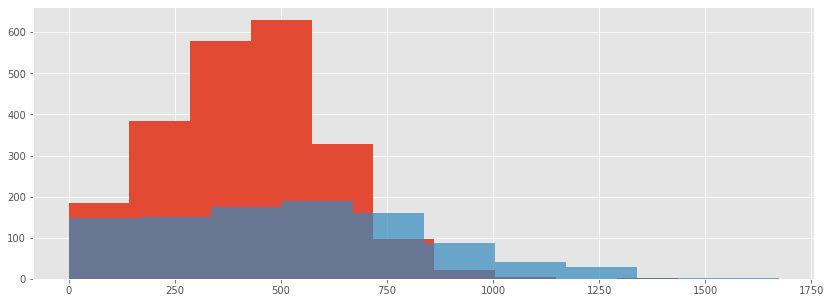

In [157]:
df_smart['duration_tariff'].hist(figsize= (14,5), alpha=1) 
df_ultra['duration_tariff'].hist(figsize= (14,5), alpha=0.7)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Не забывай пожалуйста подписывать каждый график.
    
Это важный момент всего проекта, так быстрее понять о чем идёт речь на графике.
    
</div>

**Вывод**: Мы видим, что пик гистограммы суммарной длительности звонков тарифа "Ультра" смещен правее пика тарифа "Смарт" и имеет более длинный хвост вправо. Это говорит о том, что пользователи тарифа "Ультра" в среднем тратят гораздо больше минут в месяц чем пользователи "Смарта".  

Построим гистограммы потраченного трафика в зависимости от тарифа. Синий цвет - "Смарт", желтый - "Ультра".

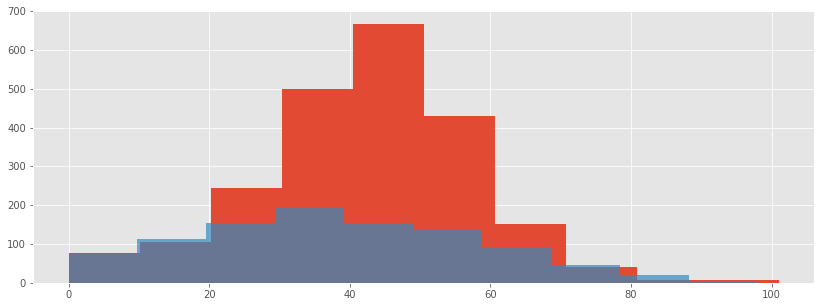

In [144]:
df_smart['gb_tariff'].hist(figsize= (14,5), alpha=1) 
df_ultra['gb_tariff'].hist(figsize= (14,5), alpha=0.7)

**Вывод**: по количеству потраченных гигабайт интернета мы видим одинаковую картину. Пик  тарифа "Смарт" смещен правее, поэтому вероятно на "Смарте" трафика интернета тратят больше чем на "Ультре."  

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются, это говорит о том, что мы можем создать функцию для построения графиков. Тем самым оптимизировав свой код.
    
</div>

Посмотрим гистограммы отправленных SMS в зависимости от тарифа. Синий цвет - "Смарт", желтый - "Ультра".

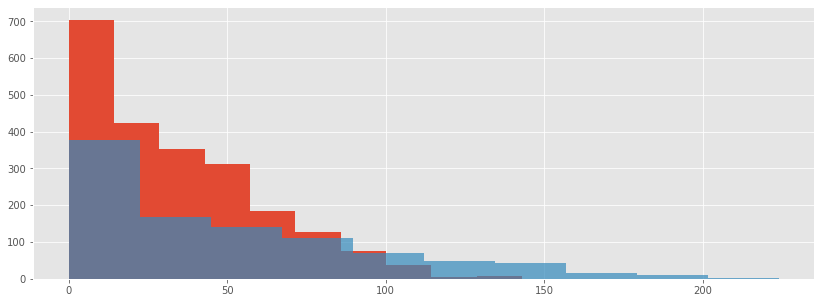

In [145]:
df_smart['mess_count'].hist(figsize= (14,5), alpha=1) 
df_ultra['mess_count'].hist(figsize= (14,5), alpha=0.7)

**Вывод**: мы видим, что у гистограммы тарифа "Ультра" хвост вправо гораздо длиннее чем у тарифа "Смарт". Это говорит о том, что поользователи тарифом "Ультра" отправляют больше сообщений.

Построим гистограммы размера выручки в зависимости от тарифа. Синий цвет - "Смарт", желтый - "Ультра".

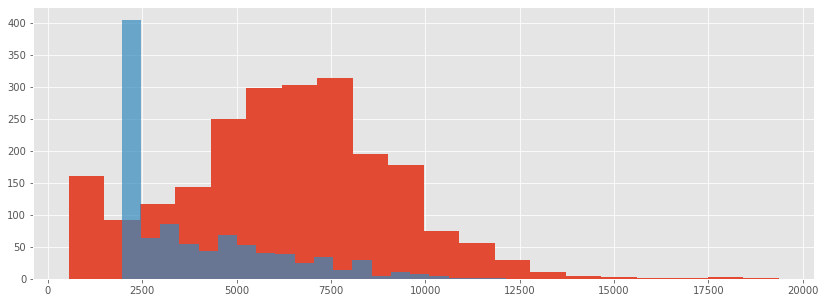

In [146]:
df_smart['profit'].hist(bins= 20, figsize= (14,5), alpha=1) 
df_ultra['profit'].hist(bins= 20,  figsize= (14,5), alpha=0.7)

**Вывод**: по оси Х(размер выручки в месяц) в диапазоне от 0 до 2500 мы видим по одному пику на каждой гистограмме. Эти пики соответствуют тем абонентам, кто не тратит больше размера фиксированной абоненской платы в месяц. Все,что правее этих пиков - это траты сверх абоненской платы. Соотнесём высоты этих пиков к высоте остальной гистограммы: на тарифе "Смарт" высота остальной гистограммы гораздо выше чем пик абоненской платы, когда на тарифе "Ультра" траты сверх пакета намного ниже абоненской платы. Гистограммы показывают, что пользователи тарифа "Ультра" более рационально умеют использовать свои траты на мобильную связь. 

Построим сводную таблицу, показывающую среднее количество потраченных минут, гигабайт трафика и SMS в зависимости от тарифа. Так же включим в неё среднюю прибыль от абонента: <a id='profit'></a>, <a id='gipa-a'></a>

In [147]:
df_tariff_table = df.pivot_table(index='tariff_name', values=['duration_tariff', 'gb_tariff', 'mess_count', 'profit'], aggfunc= 'mean')
df_tariff_table

,duration_tariff,gb_tariff,mess_count,profit
tariff_name,,,,
smart,417.748,42.399,33.369,6244.530
ultra,526.089,38.126,49.313,3842.495


Сводная таблица подтверждает наши выводы, сделанные на основе гистограмм, только здесь мы их видим ещё и в численном выражении. Пользователи тарифа "Ультра" в целом используют ресурсов больше, а платят меньше чем пользователи тарифа "Смарт".

Рссчитаем дисперсию и стандартное отклонение потраченных минут *duration_tariff*, гигабайт *gb_tariff* и SMS *mess_count* в каждом тарифе:
+ Тариф "Смарт"

In [148]:
# дисперсия
var_smart_dur = np.var(df_smart['duration_tariff'], ddof=1)
var_smart_traf = np.var(df_smart['gb_tariff'], ddof=1)
var_smart_sms = np.var(df_smart['mess_count'], ddof=1)
var_smart_profit = np.var(df_smart['profit'], ddof=1)
# стандартное отклонение
std_smart_dur = np.sqrt(var_smart_dur)
std_smart_traf = np.sqrt(var_smart_traf)
std_smart_sms = np.sqrt(var_smart_sms)
std_smart_profit = np.sqrt(var_smart_profit)
print('Дисперсия длительности звонков тарифа "Смарт": {:.0f}'.format(var_smart_dur))
print('Дисперсия потраченных гигабайт тарифа "Смарт": {:.0f}'.format(var_smart_traf))
print('Дисперсия потраченных сообщений тарифа "Смарт": {:.0f}'.format(var_smart_sms))
print('Дисперсия помесячной выручки тарифа "Смарт": {:.0f}'.format(var_smart_profit))
print('Стандартное отклонение длительности звонков тарифа "Смарт": {:.0f}'.format(std_smart_dur))
print('Стандартное отклонение потраченных гигабайт тарифа "Смарт": {:.0f}'.format(std_smart_traf))
print('Стандартное отклонение потраченных сообщений тарифа "Смарт": {:.0f}'.format(std_smart_sms))
print('Стандартное отклонение помесячной выручки тарифа "Смарт": {:.0f}'.format(std_smart_profit))

Дисперсия длительности звонков тарифа "Смарт": 36281
Дисперсия потраченных гигабайт тарифа "Смарт": 224
Дисперсия потраченных сообщений тарифа "Смарт": 797
Дисперсия помесячной выручки тарифа "Смарт": 8384399
Стандартное отклонение длительности звонков тарифа "Смарт": 190
Стандартное отклонение потраченных гигабайт тарифа "Смарт": 15
Стандартное отклонение потраченных сообщений тарифа "Смарт": 28
Стандартное отклонение помесячной выручки тарифа "Смарт": 2896


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати весь этот расчет можно было сделать с помощью сводной таблицы.
    
Где в атрибуте `aggfunc` мы укажем нужные нам метрики – `aggfunc = [np.var, np.std,]` и т.д.
    
</div>

<div class="alert alert-info">
     О, класс! Я и не знал, что в aggfunc есть такие метрики. Я пока знаю только, mean, median, sum и count))
        </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

На самом деле, рекомендую изучать всегда официальную документацию, за чистую в большинстве случаев там есть все описание 😊
    
Как раз в документации говориться о том, какой тип данных принимает атрибут `aggfunc` 
    
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
    
</div>

+ Тариф "Ультра"

In [149]:
# дисперсия
var_ultra_dur = np.var(df_ultra['duration_tariff'], ddof=1)
var_ultra_traf = np.var(df_ultra['gb_tariff'], ddof=1)
var_ultra_sms = np.var(df_ultra['mess_count'], ddof=1)
var_ultra_profit = np.var(df_ultra['profit'], ddof=1)
# стандартное отклонение
std_ultra_dur = np.sqrt(var_ultra_dur)
std_ultra_traf = np.sqrt(var_ultra_traf)
std_ultra_sms = np.sqrt(var_ultra_sms)
std_ultra_prifit = np.sqrt(var_ultra_profit)
print('Дисперсия длительности звонков тарифа "Ультра": {:.0f}'.format(var_ultra_dur))
print('Дисперсия потраченных гигабайт тарифа "Ультра": {:.0f}'.format(var_ultra_traf))
print('Дисперсия потраченных сообщений тарифа "Ультра": {:.0f}'.format(var_ultra_sms))
print('Дисперсия помесячной выручки тарифа "Ультра": {:.0f}'.format(var_ultra_profit))
print('Стандартное отклонение длительности звонков тарифа "Ультра": {:.0f}'.format(std_ultra_dur))
print('Стандартное отклонение потраченных гигабайт тарифа "Ультра": {:.0f}'.format(std_ultra_traf))
print('Стандартное отклонение потраченных сообщений тарифа "Ультра": {:.0f}'.format(std_ultra_sms))
print('Стандартное отклонение помесячной выручки тарифа "Ультра": {:.0f}'.format(std_ultra_prifit))

Дисперсия длительности звонков тарифа "Ультра": 101052
Дисперсия потраченных гигабайт тарифа "Ультра": 384
Дисперсия потраченных сообщений тарифа "Ультра": 2285
Дисперсия помесячной выручки тарифа "Ультра": 4691035
Стандартное отклонение длительности звонков тарифа "Ультра": 318
Стандартное отклонение потраченных гигабайт тарифа "Ультра": 20
Стандартное отклонение потраченных сообщений тарифа "Ультра": 48
Стандартное отклонение помесячной выручки тарифа "Ультра": 2166


#### Проверка гипотезы "Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других городов": 

Для проверки этой гипотезы нам нужно создать столбец *region*, где будет две категории: "Москва" и "Провинция":<a id='gip2-2'></a>

In [150]:
region = []
city_list = list(df['city'])
for index in range(len(city_list)):
    if city_list[index] == 'Москва':
        region.append('Москва')
    else:
        region.append('Провинция')
df['region'] = region
df.head(2)

,user_id,age,churn_date,city,reg_date,tariff_name,duration_tariff,gb_tariff,mess_count,messages_included,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_profit,traffics_profit,messages_profit,profit,region
0,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,159.000,4.000,22.000,1000,...,3000,1950,150,1,1,0.000,0.000,0.000,1950.000,Провинция
1,1000,52,2018-12-01,Краснодар,2018-05-01,ultra,172.000,49.000,60.000,1000,...,3000,1950,150,1,1,0.000,2850.000,0.000,4800.000,Провинция


**Вывод**: столбец *region* успешно добавлен, теперь можно определять среднюю выручку по регионам.

In [151]:
df_gip_2 = df.pivot_table(index='region', values='profit', aggfunc=['mean','count'])
df_gip_2

,mean,count
,profit,profit
region,,
Москва,5397.041,611
Провинция,5534.130,2605


**Вывод по гипотезе 2:** средняя выручка пользователей из Москвы и из других регионов примерно одинаковая, разница 6%. Это незначительно. Гиптеза не верна.

## Статистический анализ.

### Проверка статистической значимости Гипотезы 1:     

**Гипотеза 1**: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Для проверки этой гипотезы выдвинем нулевую гипотезу **Hо** - средняя выручка пользователей тарифом "Смарт" равна средней выручке пользователей тарифом "Ультра". Если **Ho** будет отвергнута, то будет принята альтернативная гипотеза **H1** - средние выручки пользователей тарифов "Смарт" и "Ультра" не равны. **Гипотеза 1** проверяемая в данной работе будет верна, если будет принята **Н1**, т.е.     **Гипотеза 1** == **Н1**  <a id='gipa'></a>

Представим, что у нас имеются две генеральные совокупности: Генеральная совокупность пользователей тарифом "Смарт" и Генеральная совокупность пользователей тарифом "Ультра" из которых мы взяли выборки.

Мы будем сравнивать средние значения двух выборок:
+ Пользователи тарифом "Смарт" и соответественно их средняя выручка
+ Пользователи тарифом "Ультра" и соответественно их средняя выручка

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    
Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте.
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

Получим эти выборки:

In [152]:
df_smart = df.query('tariff_name == "smart"')
df_ultra = df.query('tariff_name == "ultra"')
print('Количество значений в выборке тариф "Смарт": {}'.format(len(df_smart)))
print('Количество значений в выборке тариф "Ультра": {}'.format(len(df_ultra)))

Количество значений в выборке тариф "Смарт": 2230
Количество значений в выборке тариф "Ультра": 986


**Вывод**: выборки получены. Количество значений в них превышает 30, значит согласно ЦПТ выборочные средние будут распределяться номально.

Чтобы использовать t-test для сравнения средних значений этих выборок нужно соблюсти три условия:
+ 1. Генеральные совокупности не должны зависеть друг от друга. Такой зависимости нет, так как пользователи тарифов - это разные люди.
+ 2. Выборочные средние должны быть нормально распределены. ЦПТ нам говорит, что если количество значений в выборке больше 30, то можно утверждать, что выборочное среднее распределенор нормально. У нас количество значений больше 1000, так что условие соблюдается.
+ 3. Дисперсии Генеральных совокупностей равны. Мы не можем утверждать, что дисперсии рассматриваемых Генеральных совокупностей равны, но при проведени t-tast'а у нас есть параметр *equal_var*, которому можно дать значение *equal_var == False*, который учтет разность дисперсий.

In [153]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # отключим формат вывода больших чисел

In [154]:
profit_smart = list(df_smart['profit'])
profit_ultra = list(df_ultra['profit'])
alpha = 0.05
results = st.ttest_ind(profit_smart, profit_ultra, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else: 
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  3.335098369704004e-132
Отвергаем нулевую гипотезу


**Вывод**: по результатам t-теста мы отвергаем нулевую гипотезу **Но**, которая говорит нам , что средние выручки тарифов "Смарт" и "Ультра" равны. Значит, если **Но** отвергаем, то принимаем альтернативную гипотезу **H1 - средние выручки тарифов "Смарт" и "Ультра" не равны**.

### Проверка статистической значимости Гипотезы 2: <a id='gip2'></a>

**Гипотеза 1**: средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов. Для проверки этой гипотезы выдвинем нулевую гипотезу **Hо** - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. Если **Ho** будет отвергнута, то будет принята альтернативная гипотеза **H1** - средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов. **Гипотеза 2** проверяемая в данной работе будет верна, если **Но** не будет отвергнута.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
</div>

Представим, что у нас имеются две генеральные совокупности: Генеральная совокупность пользователей города Москва и Генеральная совокупность пользователей из других регионов из которых мы взяли выборки.

Мы будем сравнивать средние значения двух выборок:

+ Пользователи города Москва и соответественно их средняя выручка
+ Пользователи других регионов и соответественно их средняя выручка

Получим эти выборки:

In [155]:
df_moscow = df.query('region == "Москва"')
df_provinc = df.query('region == "Провинция"')
print('Количество значений в выборке "Москва": {}'.format(len(df_moscow)))
print('Количество значений в выборке "Провинция": {}'.format(len(df_provinc)))

Количество значений в выборке "Москва": 611
Количество значений в выборке "Провинция": 2605


**Вывод:** выборки получены. Количество значений в них превышает 30, значит согласно ЦПТ выборочные средние будут распределяться номально.

Для проверки гипотезы будем применять t-test. Условия применения t-test'а приведены в п 7.1. В данном пункте условия применимости аналогичны.

In [156]:
profit_moscow = list(df_moscow['profit'])
profit_provinc = list(df_provinc['profit'])
alpha = 0.05
results = st.ttest_ind(profit_moscow, profit_provinc, equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else: 
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.2656875417083935
Не получилось отвергнуть нулевую гипотезу


**Вывод**: как видим **Но** отвергнуть не получилось. Значит **Гипотеза 2 верна** - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

## Общий вывод: 

+ 1. Мы достигли главной цели проекта - определение самого перспективного тарифа. Это тариф "Смарт", так как средняя выручка от одного абонента тарифа "Смарт" гораздо выше чем средняя выручка от абонента тарифа "Ультра". [Подробнее](#profit)
+ 2. В данной работе мы проверили две гипотезы. **Гипотеза 1**: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются и **Гиптеза 2**: средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов. Результат таков:
    + Гипотеза 1 - не верна   [Подробнее](#gipa)
    + Гиптоеза 2 - верна.   [Подробнее](#gipb)
+ Количественные показатели по гипотезам: [Гипотеза 1](#gipa-a), [Гипотеза 2](#gipb-b)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
       
Рекомендую посмотреть в открытом доступе на ютубе например – курс по Алгоритмам и структурам данных, эта информация поможет нам в дальнейшем при работе с данными.
    

    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

  <div class="alert alert-info">
       Евгений, благодарю тебя за подробное и качественное ревью. Благодяря ему я пополнил свой багаж)
        </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Рад, что в целом все понятно, тогда предлагаю двигаться дальше 😊    
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
</div>